# Catalogs

`ztfimg.catalog` provides tools query catalogs using the [vizier service](https://vizier.cds.unistra.fr/viz-bin/VizieR) through the `astroquery` package. 

***
## download a catalog

let's load an image and get the gaiadr3 catalog ("I/355/gaiadr3" from vizier).

### Get the image center position

In [1]:
import ztfimg
qimg = ztfimg.ScienceQuadrant.from_filename("ztf_20200924431759_000655_zr_c13_o_q3_sciimg.fits",
                                   as_path=False)

The image centroid is given by the `get_center()` method

In [2]:
radec = qimg.get_center(system="radec") # default is xy, so pixel units
radec

array([57.99769864, 35.74651556])

### query for the catalog

let's get the cone search catalog with a 1 deg radius around the image center ; 1 deg is slightly more than the Quadrant half diagonal

In [3]:
from ztfimg import catalog

In [4]:
%%time
cat = catalog.download_vizier_catalog("I/355/gaiadr3", radec, radius=0.7)

CPU times: user 2.6 s, sys: 116 ms, total: 2.71 s
Wall time: 5.58 s


The ra, dec columns are copies of 'RA_ICRS', 'DE_ICRS' (by default, see download_vizier_catalog options) to harmonize the code. 

### let's see how it looks.

For that we will :
1. show the image
2. convert the ra, dec coordinates into x,y pixels
3. plot the expected object location

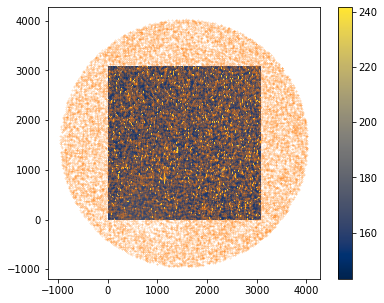

In [6]:
%matplotlib inline

# show the data
fig = qimg.show()
# access the main panel axes
ax = fig.axes[0]

# Converts catalog's ra,dec into pixel's x, y
x, y = qimg.radec_to_xy(*cat[["ra", "dec"]].values.T)

# show the expected catalog star location within the image
ax.scatter(x,y, s=1, marker="x", color="C1", alpha=0.2)

and let's zoom in

(1420.0, 1620.0)

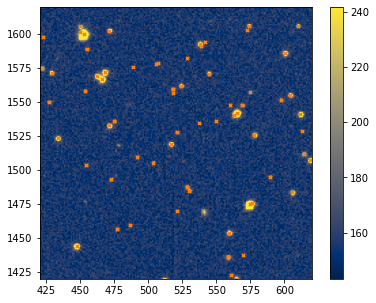

In [7]:
%matplotlib inline

# show the data
fig = qimg.show()
# access the main panel axes
ax = fig.axes[0]

# Converts catalog's ra,dec into pixel's x, y
x, y = qimg.radec_to_xy(*cat[["ra", "dec"]].values.T)

# show the expected catalog star location within the image
# -> changing the plot properties
ax.scatter(x,y, s=10, marker="x", color="C1", alpha=1)

# + zoom
ax.set_xlim(420,620)
ax.set_ylim(1420,1620)

### catalog short names

To simplify the user's experience, a few catalog name have short-names. e.g. "gaia" or "gaiadr3" is understood as "I/355/gaiadr3". See complete list in `download_vizier_catalog()` docstrings

***
## quadrant.get_catalog()

The `get_catalog()` method of quadrants provide a short cut to the above manual catalog extraction. It includes the addition of the pixel (x, y) coordinates within the catalog data frame (if a wcs solution is not available, they will be set to NaN) and, optionally, is able to discard catalog entries outside the image footprint. 

we use the "gaia" or "gaiadr3" shortname for "I/355/gaiadr3".

In [8]:
cat = qimg.get_catalog("gaiadr3")

The x,y columns have been added

In [9]:
cat.columns

Index(['RA_ICRS', 'e_RA_ICRS', 'DE_ICRS', 'e_DE_ICRS', 'Source', 'Plx',
       'e_Plx', 'PM', 'pmRA', 'e_pmRA', 'pmDE', 'e_pmDE', 'RUWE', 'FG', 'e_FG',
       'Gmag', 'e_Gmag', 'FBP', 'e_FBP', 'BPmag', 'e_BPmag', 'FRP', 'e_FRP',
       'RPmag', 'e_RPmag', 'BP-RP', 'RVDR2', 'e_RVDR2', 'Tefftemp', 'loggtemp',
       'PS1', 'SDSSDR13', 'SkyMapper2', 'URAT1', 'GmagCorr', 'e_GmagCorr',
       'FGCorr', 'RAJ2000', 'DEJ2000', 'ra', 'dec', 'x', 'y'],
      dtype='object')

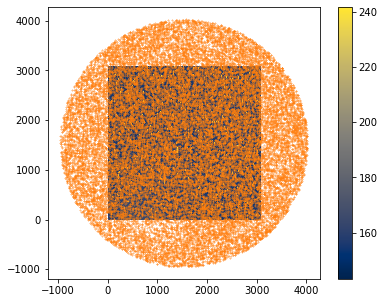

In [10]:
%matplotlib inline

# show the data
fig = qimg.show()
# access the main panel axes
ax = fig.axes[0]

# show the expected catalog star location within the image
ax.scatter(*cat[["x", "y"]].values.T, s=1, marker="x", color="C1", alpha=0.5)

### Including the in_fov option

In [11]:
cat = qimg.get_catalog("gaiadr3", in_fov=True)

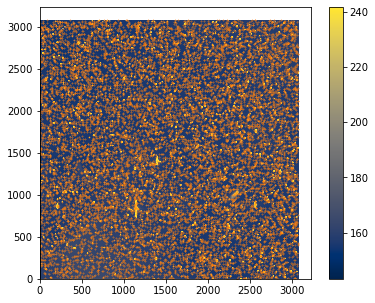

In [12]:
%matplotlib inline

# show the data
fig = qimg.show()
# access the main panel axes
ax = fig.axes[0]

# show the expected catalog star location within the image
ax.scatter(*cat[["x", "y"]].values.T, s=1, marker="x", color="C1", alpha=0.5)

***
## get_catalog from CCD

The CCD object has a `get_catalog()` method while not directly holding a wcs solution (they are quadrant based). the `get_catalog()` ccd method atually loops over the ccd quadrants' and updates their x and y position to convert them into ccd pixel coordinates (and not quadrants). This method can also, optionnaly, drop duplicated entries. 

In [13]:
ccdimg = qimg.get_ccd()

In [14]:
cat_ccd = ccdimg.get_catalog("gaia", in_fov=True) # drop_duplicate=True is useless with in_fov (per quadrant)

In [15]:
cat_ccd.head()

,Source,RA_ICRS,e_RA_ICRS,DE_ICRS,e_DE_ICRS,Plx,e_Plx,PM,pmRA,e_pmRA,...,URAT1,GmagCorr,e_GmagCorr,FGCorr,RAJ2000,DEJ2000,ra,dec,x,y
0,218916785180403840,59.445642,0.1874,35.279556,0.1277,-0.0412,0.2436,0.421,-0.062,0.278,...,627052425,18.890215,0.003396,523.429993,59.445643,35.279554,59.445643,35.279554,5782.221785,25.626816
1,218916819540141184,59.425020,0.4804,35.278836,0.3261,0.0473,0.6854,3.028,0.850,0.761,...,<NA>,20.137619,0.005522,165.919998,59.425016,35.278849,59.425016,35.278849,5722.483583,20.638801
2,218916823837087104,59.433739,4.0164,35.273722,1.9008,NaN,NaN,NaN,NaN,NaN,...,<NA>,20.996605,0.018416,75.214996,59.433739,35.273722,59.433739,35.273722,5748.565750,3.460110
3,218916853899876096,59.434783,0.1885,35.275006,0.1218,0.3394,0.2423,1.570,1.389,0.284,...,627052410,18.859005,0.003363,538.700012,59.434775,35.275002,59.434775,35.275002,5751.378951,8.137112
4,218916853899882752,59.429601,0.1646,35.281860,0.1097,0.5057,0.2134,2.468,-0.720,0.251,...,627052406,18.641842,0.003277,657.979980,59.429605,35.281870,59.429605,35.281870,5735.343826,31.929305


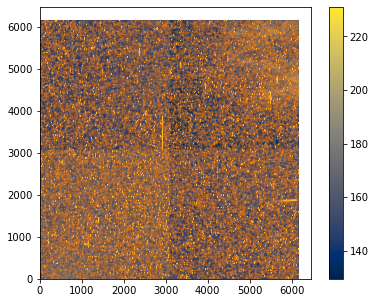

In [16]:
%matplotlib inline

# show the data
fig = ccdimg.show()
# access the main panel axes
ax = fig.axes[0]

# show the expected catalog star location within the image
ax.scatter(*cat_ccd[["x", "y"]].values.T, s=1, marker="x", color="C1", alpha=0.2)

let's zoom to see

(3030.0, 3130.0)

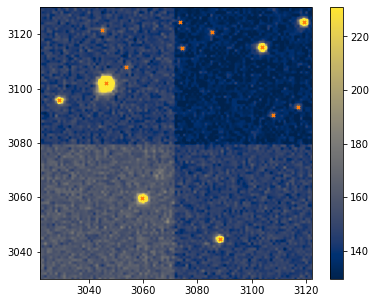

In [17]:
%matplotlib inline

# show the data
fig = ccdimg.show()
# access the main panel axes
ax = fig.axes[0]

# show the expected catalog star location within the image
ax.scatter(*cat_ccd[["x", "y"]].values.T, s=10, marker="x", color="C1", alpha=1)

# zooming in the center where quadrant's meet
zwidth = 50
ax.set_xlim( ccdimg.qshape[1]-zwidth, ccdimg.qshape[1]+zwidth)
ax.set_ylim( ccdimg.qshape[0]-zwidth, ccdimg.qshape[0]+zwidth)

***
## dask and catalog

dask is natively supported for the catalog as it is for the images. Simply add the `use_dask=True` option, and the returned catalog will be a dask.dataframe ready for compute() or persit() (see dask documentation).

By default, the use_dask option follow that of the image. 

**careful** dask.dataframe requires to know in advance the columns that will be downloaded. For convenience, gaiadr3 ("I/350/gaiaedr3") and ps1 ("II/349/ps1") default returned columns have been stored in the code. But you will need to provide the columns key-argement when calling get_catalog() for any other vizier catalog query

In [18]:
import dask
from dask.distributed import Client
client = Client()

2023-04-19 16:01:26,274 - distributed.diskutils - INFO - Found stale lock file and directory '/var/folders/kt/dnsb_cyx445cbz2ht_3l2m6w00029p/T/dask-worker-space/worker-v6xq7b2_', purging
2023-04-19 16:01:26,274 - distributed.diskutils - INFO - Found stale lock file and directory '/var/folders/kt/dnsb_cyx445cbz2ht_3l2m6w00029p/T/dask-worker-space/worker-lt4k0y9_', purging
2023-04-19 16:01:26,275 - distributed.diskutils - INFO - Found stale lock file and directory '/var/folders/kt/dnsb_cyx445cbz2ht_3l2m6w00029p/T/dask-worker-space/worker-a0g1h6za', purging
2023-04-19 16:01:26,275 - distributed.diskutils - INFO - Found stale lock file and directory '/var/folders/kt/dnsb_cyx445cbz2ht_3l2m6w00029p/T/dask-worker-space/worker-cp7f9idr', purging
2023-04-19 16:01:26,275 - distributed.diskutils - INFO - Found stale lock file and directory '/var/folders/kt/dnsb_cyx445cbz2ht_3l2m6w00029p/T/dask-worker-space/worker-lw7ih5zo', purging


Let's load a “dasked“ quadrant

In [19]:
import ztfimg
qimg = ztfimg.ScienceQuadrant.from_filename("ztf_20200924431759_000655_zr_c13_o_q3_sciimg.fits",
                                   as_path=False, use_dask=True)

In [20]:
qimg.data

dask.array<from-value, shape=(3080, 3072), dtype=float32, chunksize=(3080, 3072), chunktype=numpy.ndarray>

In [22]:
%%time
# use_dask = None by default, meaning "whatever self.use_dask is", here it is true
cat = qimg.get_catalog("gaia", in_fov=True) # option still works

CPU times: user 48.7 ms, sys: 11.8 ms, total: 60.6 ms
Wall time: 518 ms


In [23]:
cat

,RA_ICRS,e_RA_ICRS,DE_ICRS,e_DE_ICRS,Source,Plx,e_Plx,PM,pmRA,e_pmRA,pmDE,e_pmDE,RUWE,FG,e_FG,Gmag,e_Gmag,FBP,e_FBP,BPmag,e_BPmag,FRP,e_FRP,RPmag,e_RPmag,BP-RP,RVDR2,e_RVDR2,Tefftemp,loggtemp,PS1,SDSSDR13,SkyMapper2,URAT1,GmagCorr,e_GmagCorr,FGCorr,RAJ2000,DEJ2000,ra,dec,x,y
npartitions=1,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...


In [24]:
gaiacat = cat.compute() # this calls the download !

In [25]:
gaiacat.head()

,RA_ICRS,e_RA_ICRS,DE_ICRS,e_DE_ICRS,Source,Plx,e_Plx,PM,pmRA,e_pmRA,...,URAT1,GmagCorr,e_GmagCorr,FGCorr,RAJ2000,DEJ2000,ra,dec,x,y
1786,57.919998,0.0353,35.314919,0.0257,219667549762287232,0.4861,0.0483,2.954,0.813,0.050,...,627050068,15.891280,0.002778,8287.700195,57.919993,35.314931,57.919993,35.314931,1353.175049,0.298703
1793,57.963358,0.0527,35.316617,0.0390,219667687201238784,0.9717,0.0665,9.916,-1.284,0.069,...,627050130,16.690584,0.002818,3969.300049,57.963365,35.316661,57.963365,35.316661,1478.798340,9.834139
1794,57.960014,0.3199,35.314427,0.2350,219667687201239040,0.6343,0.4064,4.407,3.341,0.425,...,<NA>,19.445992,0.003957,313.730011,57.959996,35.314414,57.959996,35.314414,1469.241577,1.583581
1798,57.986512,0.2561,35.315880,0.1936,219667717262618368,0.8189,0.3198,1.607,-1.359,0.330,...,627050154,19.345600,0.004042,344.119995,57.986519,35.315883,57.986519,35.315883,1546.022705,8.901405
1801,57.998718,0.2053,35.313181,0.1469,219667751622355584,0.0333,0.2546,1.474,-0.911,0.254,...,<NA>,18.969753,0.003471,486.459991,57.998722,35.313186,57.998722,35.313186,1581.674805,0.282787


**tip**: you may want to call .persist() for the catalog to actually launch the downloading as soon as possible

In [26]:
client.close()